In [26]:
## 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
## 데이터 로드
df = pd.read_csv('https://raw.githubusercontent.com/TrulySangwonDays/Ecommerce_Churn_Analysis/refs/heads/main/ECommerce.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [28]:
# 데이터 크기
df.shape

(5630, 20)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

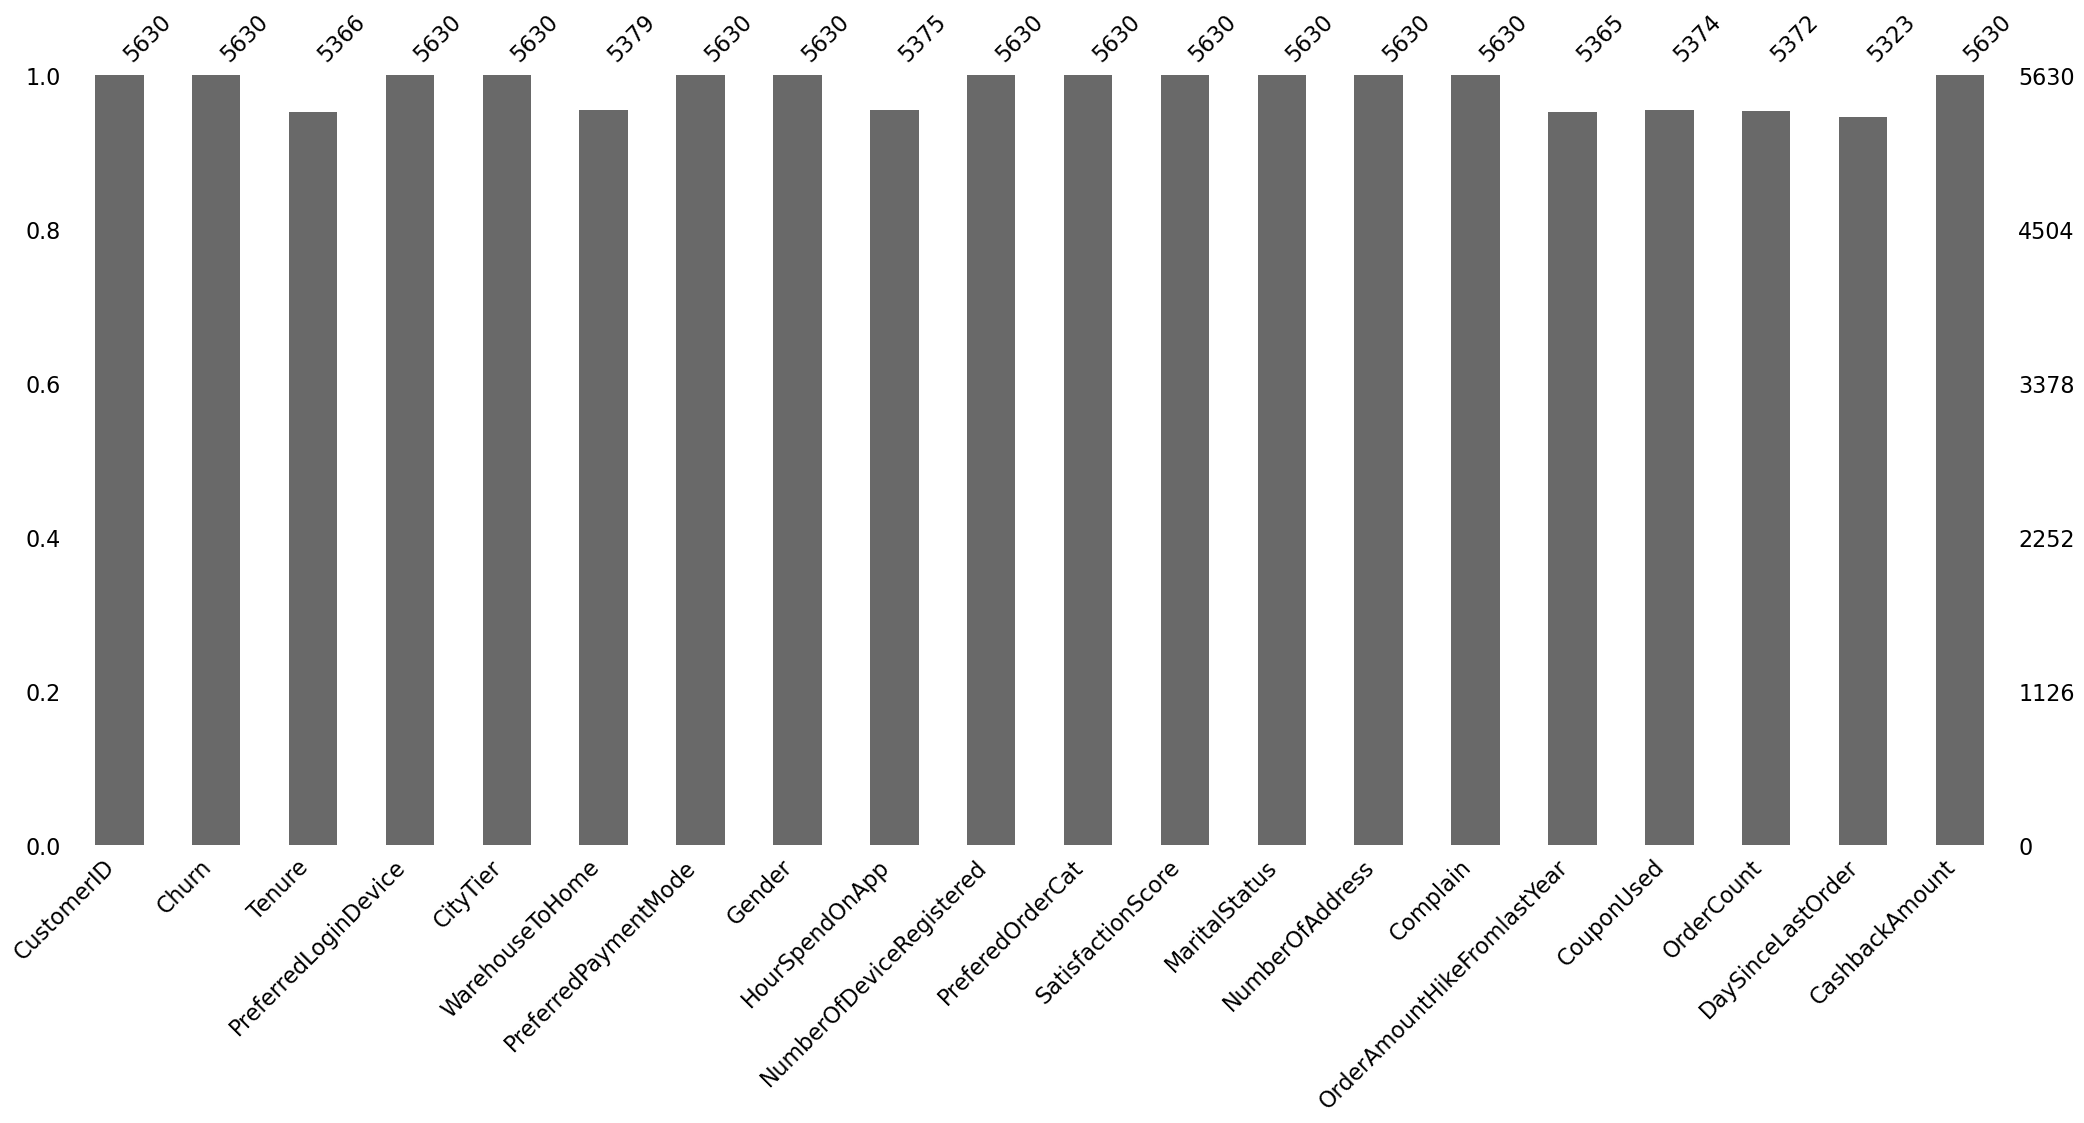

In [30]:
# 결측치 시각화
import missingno as msno

plt.figure(figsize=(8, 4))
msno.bar(df)
plt.show()

In [31]:
# 결측치 존재 칼럼: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
# Tenure: 고객 유지기간, 보유기간으로 해석 가능

In [32]:
# 결측치가 하나라도 존재하는 행의 개수
# len(df) - len(df2)

# 타겟 분포 파악(Churn)

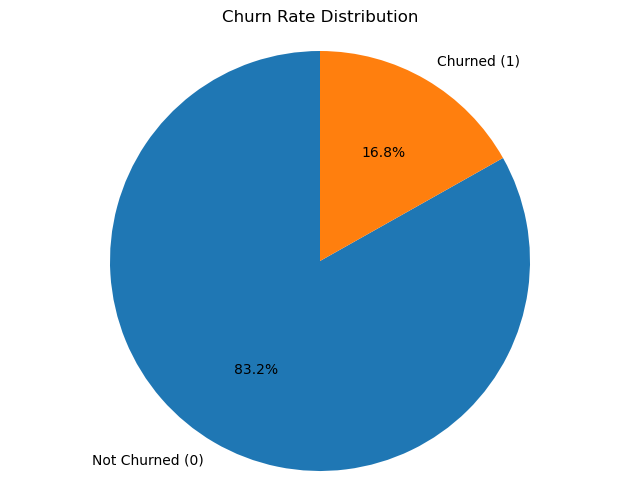

In [33]:
# 이탈 고객 비율 계산
churn_counts = df['Churn'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Not Churned (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate Distribution')
plt.axis('equal')
plt.show()

이탈하지 않은 고객과 이탈 고객 비율은 8:2 정도

# 타겟 외 변수 분포 확인

## 1. Tenure(가입 기간)

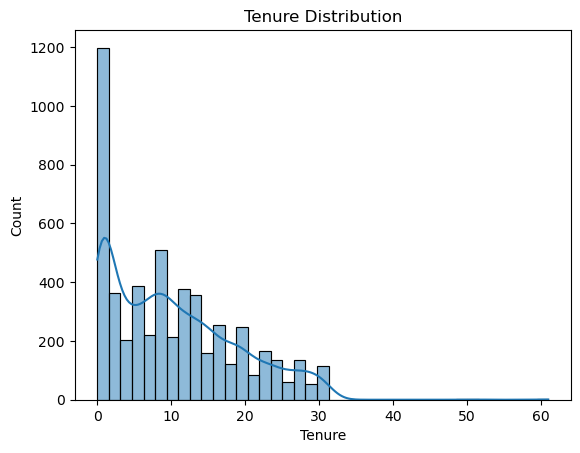

In [34]:
sns.histplot(df['Tenure'], kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.show()
# 숫자의 크기로 보아 개월 수를 의미하는 듯

In [35]:
df['Tenure'].describe()
# Tenure의 NaN값은 혹시 1개월 미만인 고객을 의미하는 걸까? 했는데
# 아예 0값도 존재하는 것을 보니 그건 아닌 것 같음

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

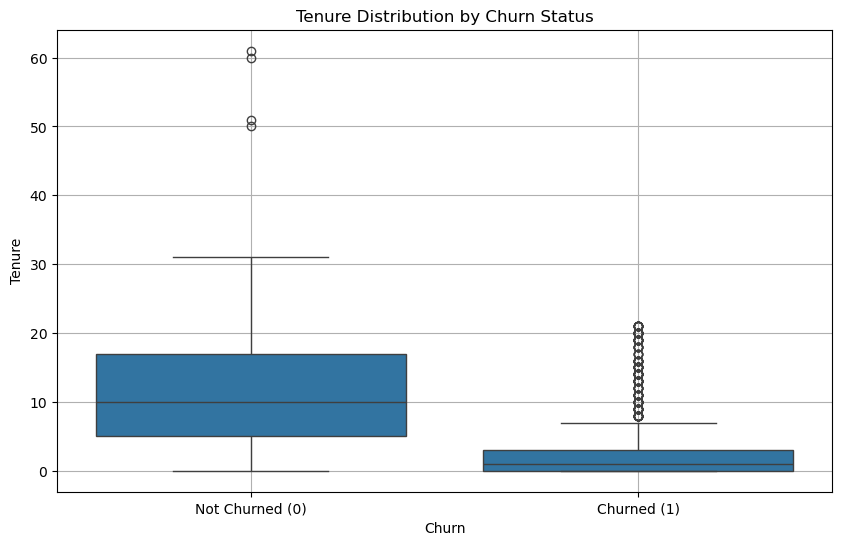

In [36]:
# 이탈 여부에 따른 가입기간 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])  # x축 레이블 설정
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.grid()
plt.show()

이탈고객들이 가입 기간이 훨씬 짧은 것을 볼 수 있음(가입 초기에 이탈했다)

## PreferredLoginDevice(선호 로그인 기기)

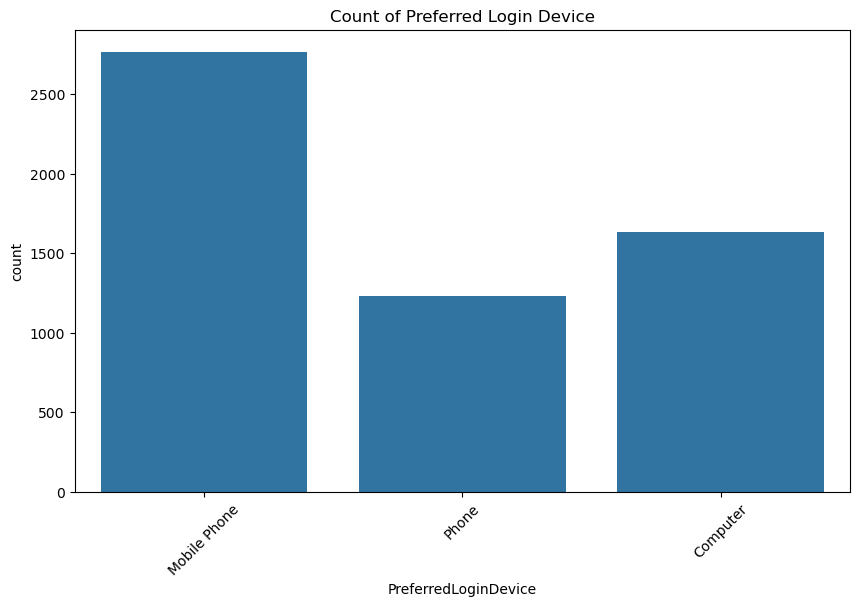

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredLoginDevice', data=df)
plt.title('Count of Preferred Login Device')
plt.xticks(rotation=45)
plt.show()

Mobile Phone과 Phone의 차이점이 뭐지..??

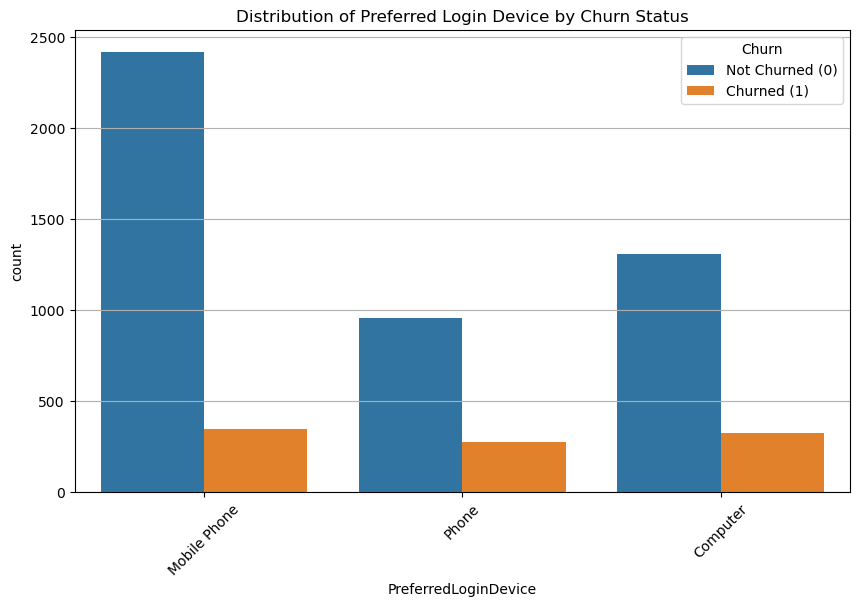

In [38]:
# Churn 값에 따른 PreferredLoginDevice 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Distribution of Preferred Login Device by Churn Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid(axis='y')
plt.show()

## CityTier(도시 계층)

CityTier 칼럼은 일반적으로 도시의 계층이나 등급을 나타내는 지표로 사용됩니다. 1에서 3까지의 값은 보통 다음과 같은 의미를 가집니다:

+ CityTier 1: 대도시 또는 주요 도시 (예: 인구가 많고 경제가 발달한 도시)

+ CityTier 2: 중소도시 (예: 인구가 적고 경제가 상대적으로 덜 발달한 도시)

+ CityTier 3: 소도시 또는 농촌 지역 (예: 인구가 적고 경제가 덜 발달한 지역)

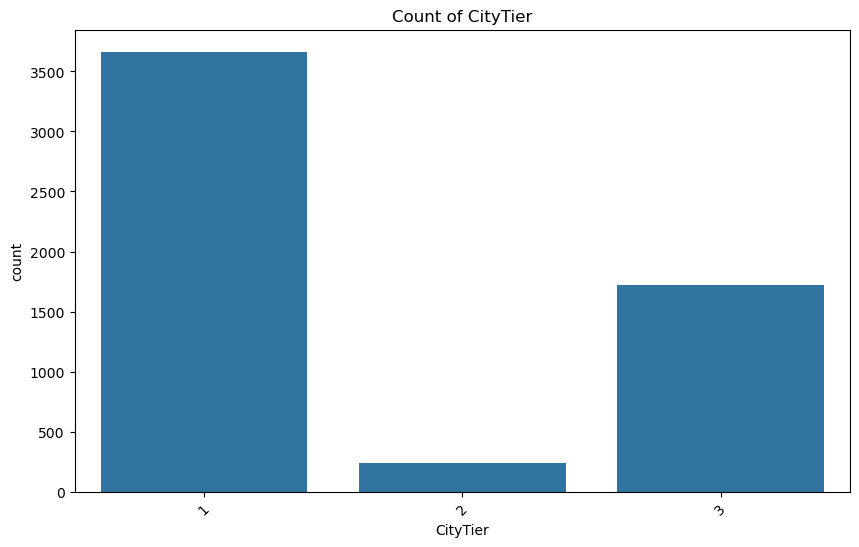

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CityTier', data=df)
plt.title('Count of CityTier')
plt.xticks(rotation=45)
plt.show()

대도시 - 중소도시 - 소도시 순으로 많을 줄 알았는데 대-소-중 순으로 많음

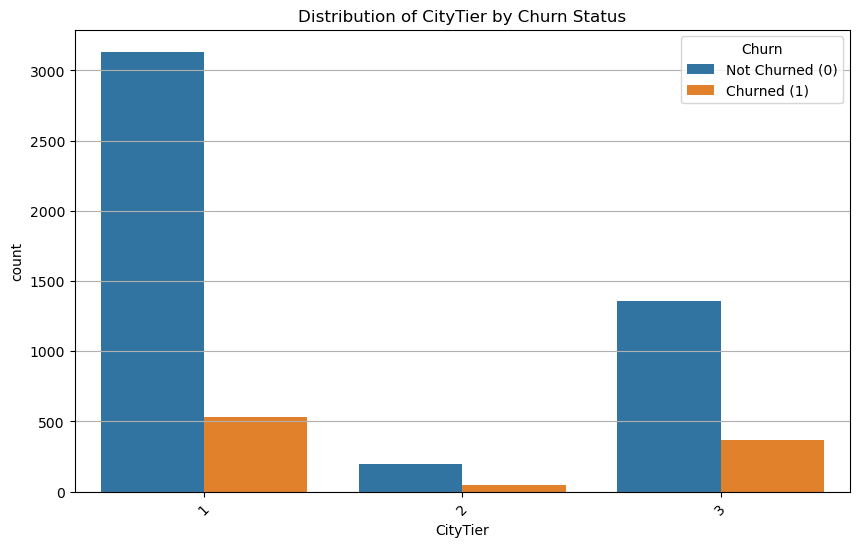

In [40]:
# Churn 값에 따른 CityTier 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='CityTier', hue='Churn', data=df)
plt.title('Distribution of CityTier by Churn Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid(axis='y')
plt.show()

## WarehouseToHome(배송 거리)

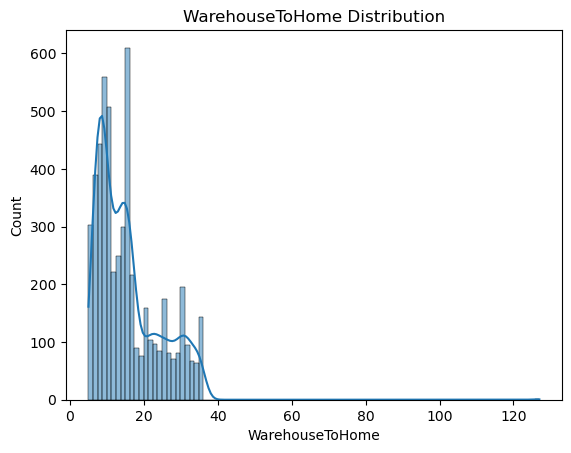

In [41]:
sns.histplot(df['WarehouseToHome'], kde=True)
plt.title('WarehouseToHome Distribution')
plt.xlabel('WarehouseToHome')
plt.show()

단위는 km인가?

대체로 10~20km에 분포하지만 이상치가 있어보임

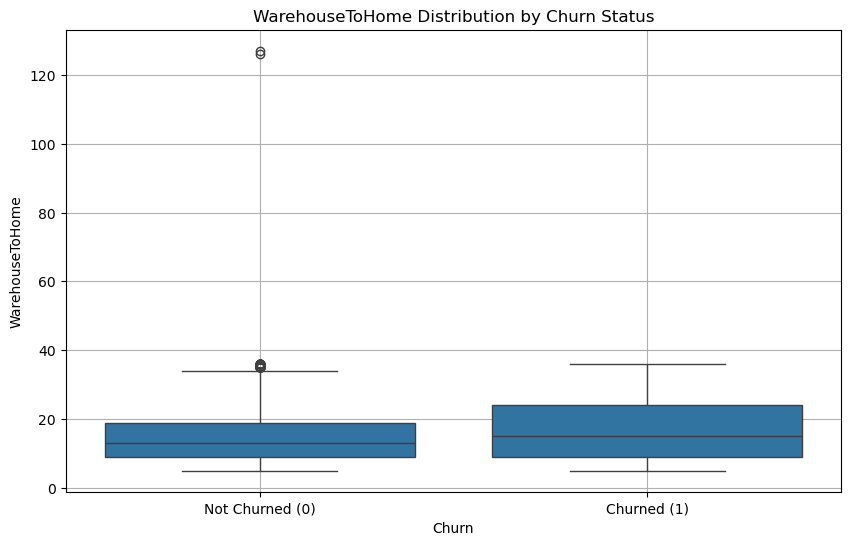

In [42]:
# 이탈 여부에 따른 배송거리 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df)
plt.title('WarehouseToHome Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('WarehouseToHome')
plt.grid()
plt.show()

이탈고객들의 배송 거리가 조금 더 멀어보이긴 하나

통계적으로 유의미한 수준일지는 모르겠음

## PreferredPaymentMode(선호 결제 방식)

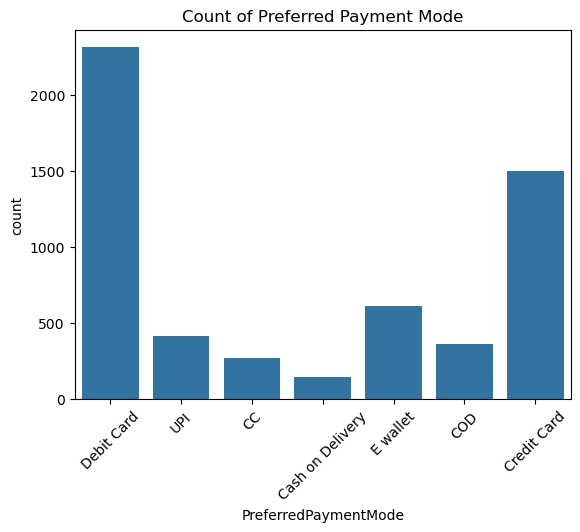

In [43]:
sns.countplot(x='PreferredPaymentMode', data=df)
plt.title('Count of Preferred Payment Mode')
plt.xticks(rotation=45)
plt.show()

+ Debit Card (직불카드): 고객의 은행 계좌에서 직접 금액이 인출되는 카드입니다. 결제 시 사용자의 잔액 내에서만 결제가 가능합니다.

+ UPI (Unified Payments Interface): 인도의 즉각적인 전자 결제 시스템으로, 사용자 간의 즉각적인 송금 및 결제를 지원합니다. 스마트폰 앱을 통해 사용할 수 있습니다.

+ CC (Credit Card, 신용카드): 은행이 고객에게 일정 금액까지 신용을 제공하고, 고객이 이를 사용하여 결제하는 카드입니다. 결제 후 일정 기간 내에 상환해야 합니다.

+ Cash on Delivery (COD, 현금 배달): 고객이 상품을 받을 때 현금으로 결제하는 방식입니다. 온라인 쇼핑에서 흔히 사용됩니다.

+ E wallet (전자 지갑): 모바일 기기에서 결제 정보를 저장하고 관리할 수 있는 디지털 지갑입니다. 예를 들어, 카카오페이, 네이버페이 등.

+ COD (Cash on Delivery, 현금 배달): 위와 동일하게, 고객이 상품을 받을 때 현금으로 결제하는 방식입니다.

+ Credit Card (신용카드): 위에서 설명한 것과 동일합니다.

CC - Credit Card

COD - Cash On Delivery

이렇게 동일한 의미인 것 같은데 왜 따로 구분되어 있는지 모르겠음

합쳐서 봐야 할듯

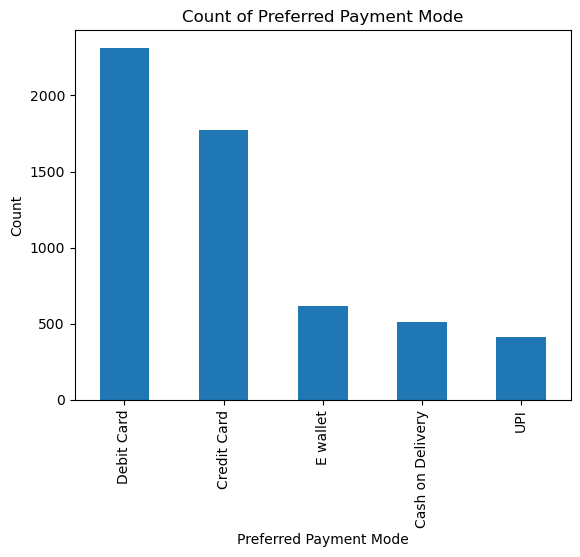

In [44]:
# 동일한 의미를 가진 값들을 하나로 통합
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

df['PreferredPaymentMode'].value_counts().plot.bar()
plt.title('Count of Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.show()

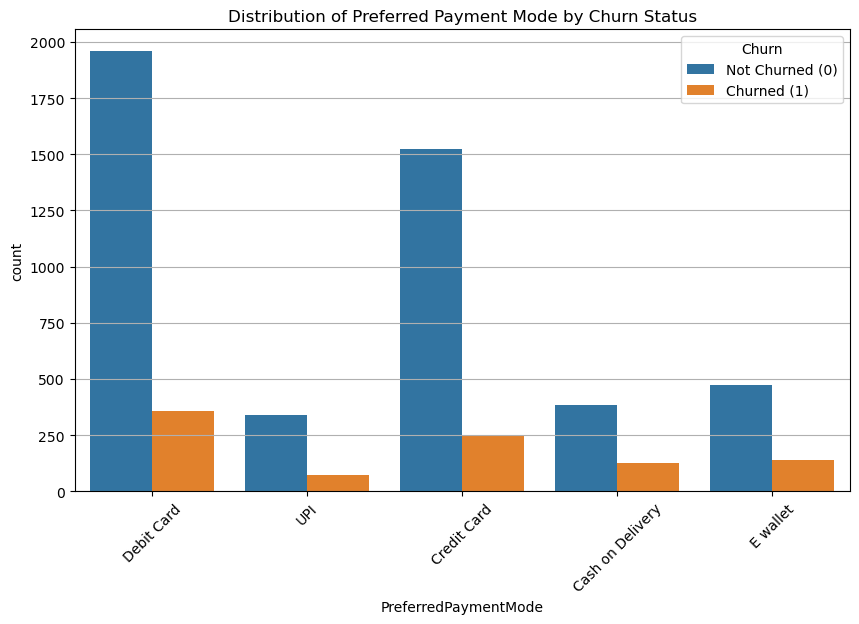

In [45]:
# Churn 값에 따른 PreferredPaymentMode 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Distribution of Preferred Payment Mode by Churn Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid(axis='y')
plt.show()

## Gender(성별)

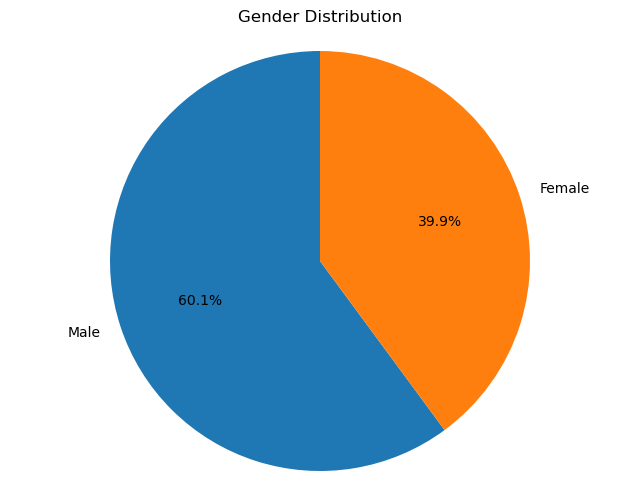

In [46]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

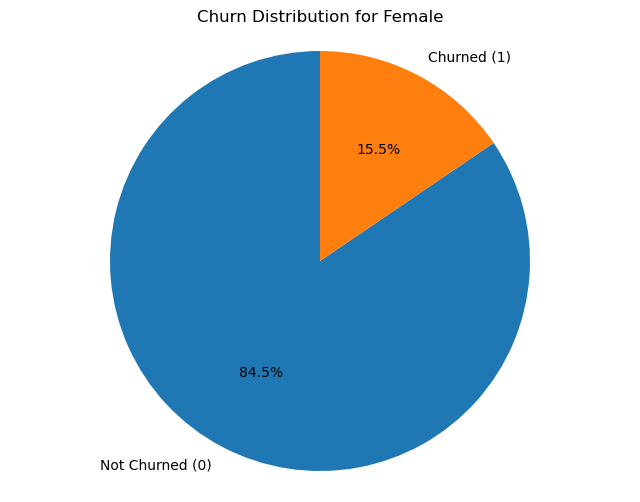

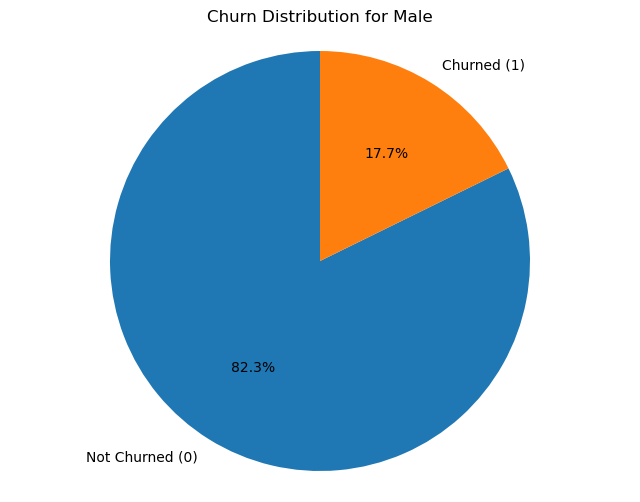

In [47]:
# Gender에 따른 이탈 비율 시각화
for gender in df['Gender'].unique():
    plt.figure(figsize=(8, 6))
    gender_data = df[df['Gender'] == gender]
    churn_counts = gender_data['Churn'].value_counts()

    plt.pie(churn_counts, labels=['Not Churned (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Churn Distribution for {gender}')
    plt.axis('equal')
    plt.show()

남자가 조금 더 이탈률이 높음

## HourSpendOnApp(앱 사용 시간)

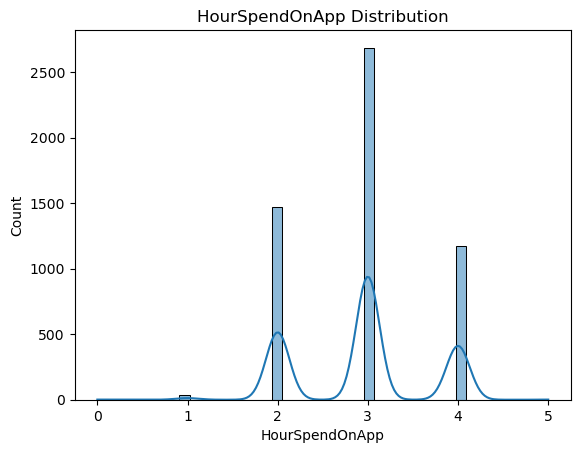

In [48]:
sns.histplot(df['HourSpendOnApp'], kde=True)
plt.title('HourSpendOnApp Distribution')
plt.xlabel('HourSpendOnApp')
plt.show()

이게 total 값은 아닐거고 하루 평균이나 일주일 평균을 뜻하는 건가??

In [49]:
df['HourSpendOnApp'].dtype

dtype('float64')

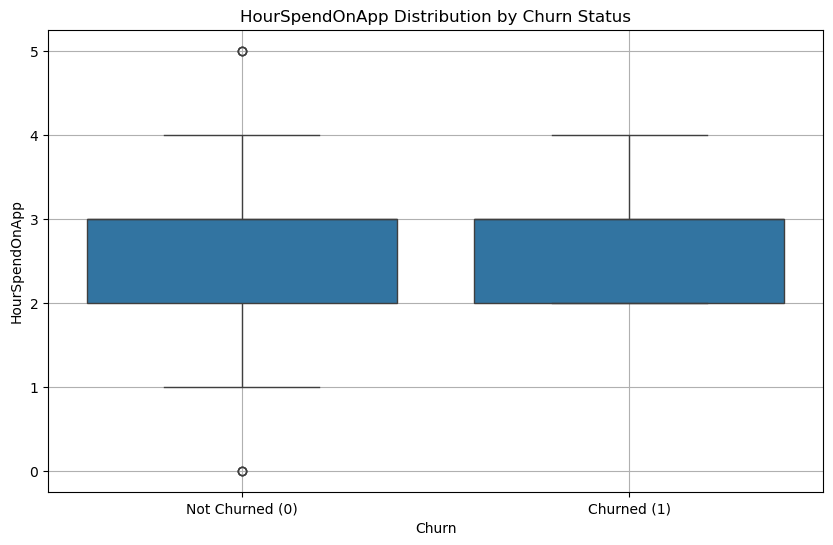

In [50]:
# 이탈 여부에 따른 앱 사용시간 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df)
plt.title('HourSpendOnApp Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('HourSpendOnApp')
plt.grid()
plt.show()

## NumberOfDeviceRegistered(등록된 기기 수)




In [51]:
df['NumberOfDeviceRegistered'].dtype

dtype('int64')

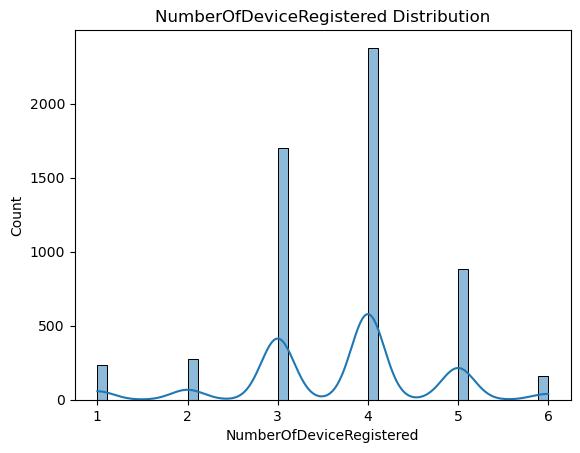

In [52]:
sns.histplot(df['NumberOfDeviceRegistered'], kde=True)
plt.title('NumberOfDeviceRegistered Distribution')
plt.xlabel('NumberOfDeviceRegistered')
plt.show()

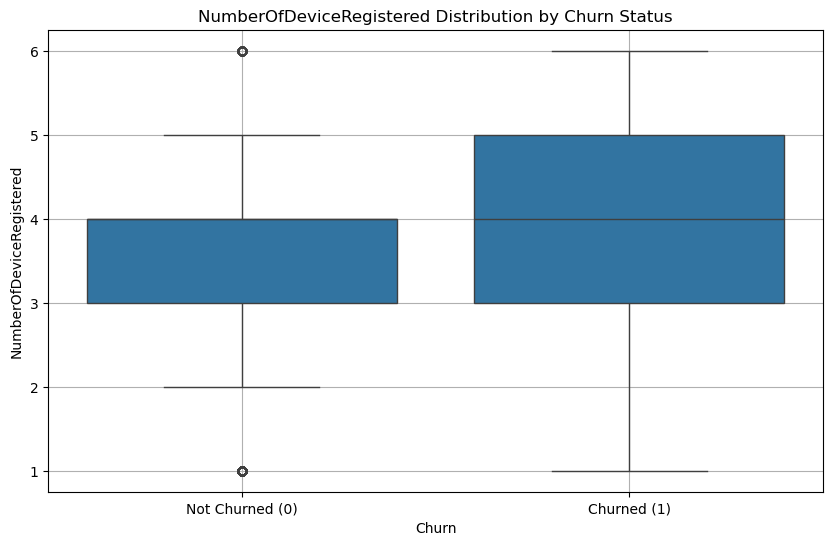

In [53]:
# 이탈 여부에 따른 등록 기기 수 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df)
plt.title('NumberOfDeviceRegistered Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('NumberOfDeviceRegistered')
plt.grid()
plt.show()

## PreferedOrderCat(선호 주문 품목)

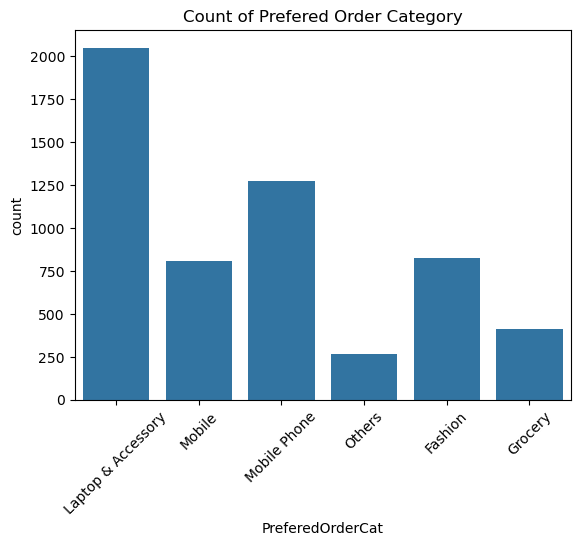

In [54]:
sns.countplot(x='PreferedOrderCat', data=df)
plt.title('Count of Prefered Order Category')
plt.xticks(rotation=45)
plt.show()

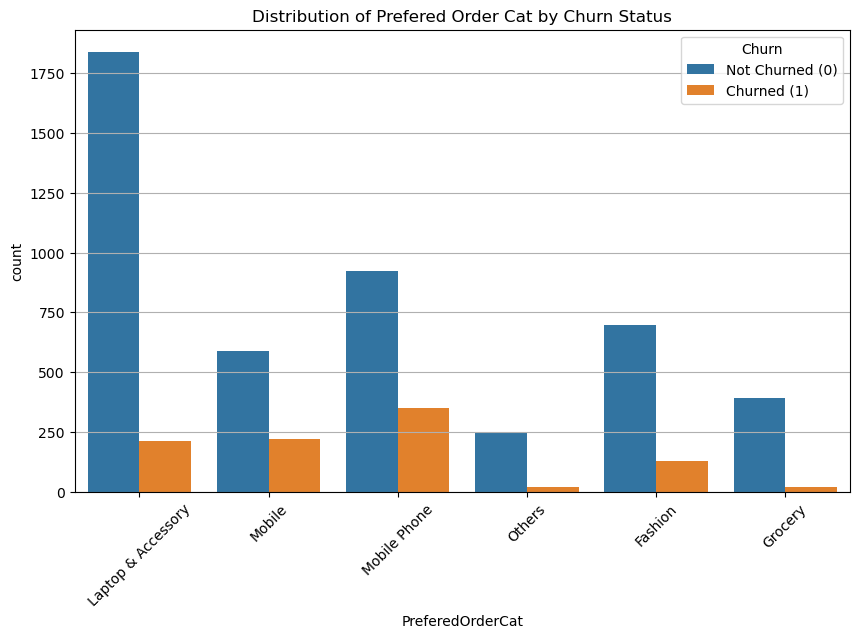

In [55]:
# Churn 값에 따른 PreferedOrderCat 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferedOrderCat', hue='Churn', data=df)
plt.title('Distribution of Prefered Order Cat by Churn Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid(axis='y')
plt.show()

Mobile, Mobile Phone 종류에서 이탈률이 다소 높아보임

## SatisfactionScore(만족도)

In [56]:
df['SatisfactionScore'].dtype

dtype('int64')

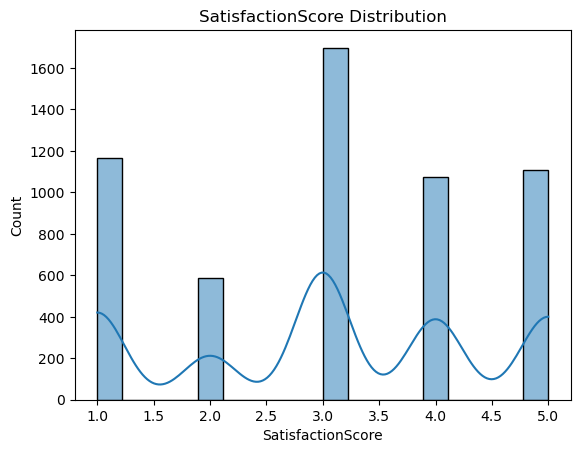

In [57]:
sns.histplot(df['SatisfactionScore'], kde=True)
plt.title('SatisfactionScore Distribution')
plt.xlabel('SatisfactionScore')
plt.show()

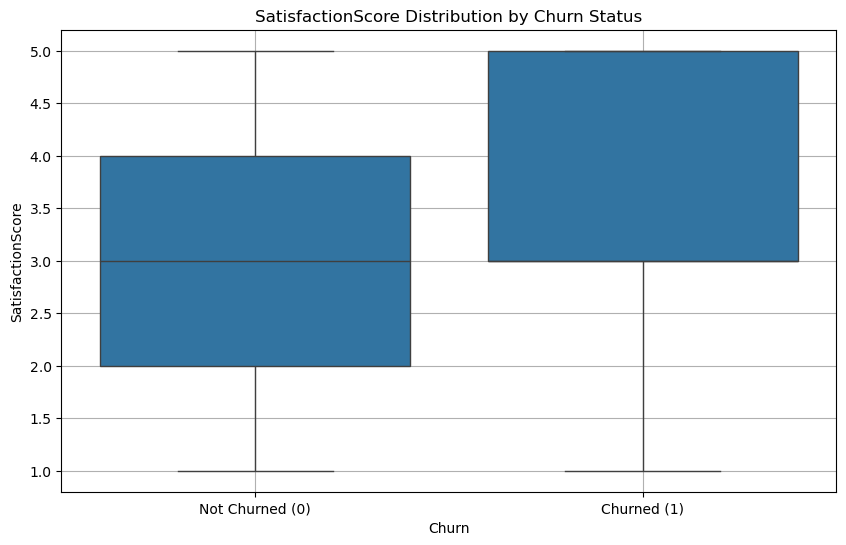

In [58]:
# 이탈 여부에 따른 만족도 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('SatisfactionScore Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('SatisfactionScore')
plt.grid()
plt.show()

이탈 고객들이 만족도 점수가 더 높음

-> 점수가 크다고 해서 만족도가 높다고 해석할 수 없음.

큰 숫자가 불만족을 의미한다고 해석하는 것이 오히려 자연스러운 흐름

## MaritalStatus(결혼여부)

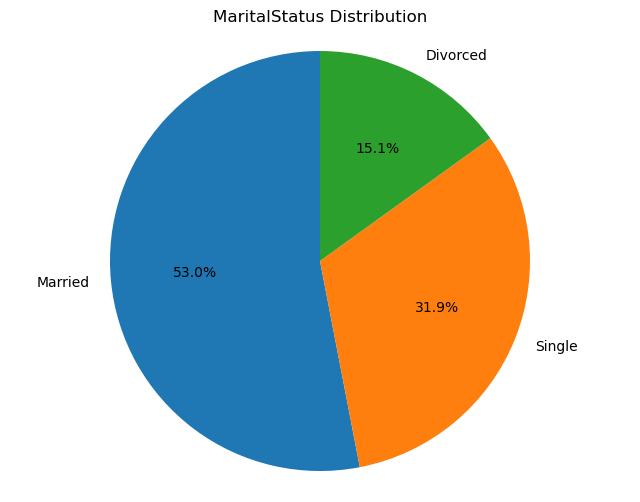

In [59]:
marital_counts = df['MaritalStatus'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('MaritalStatus Distribution')
plt.axis('equal')
plt.show()

Divorced: 이혼한


결혼한 상태의 고객이 더 많음

-> 주요 품목이 Laptop이었으므로 경제적 여유가 있는 세대의 비중이 높을 것

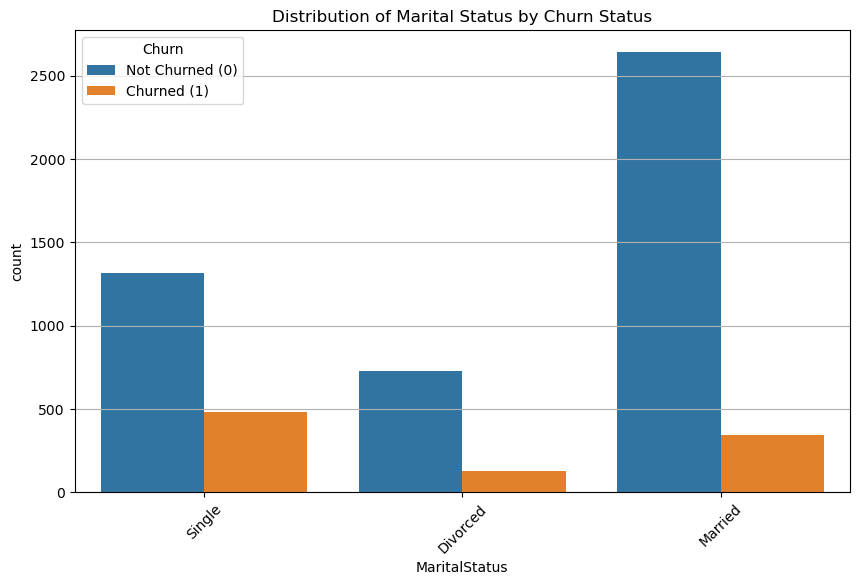

In [60]:
# Churn 값에 따른 MaritalStatus 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Churn', data=df)
plt.title('Distribution of Marital Status by Churn Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.grid(axis='y')
plt.show()

Single에서 이탈 비율이 높게 나타남

## NumberOfAddress(등록 주소 수)

In [61]:
df['NumberOfAddress'].dtype

dtype('int64')

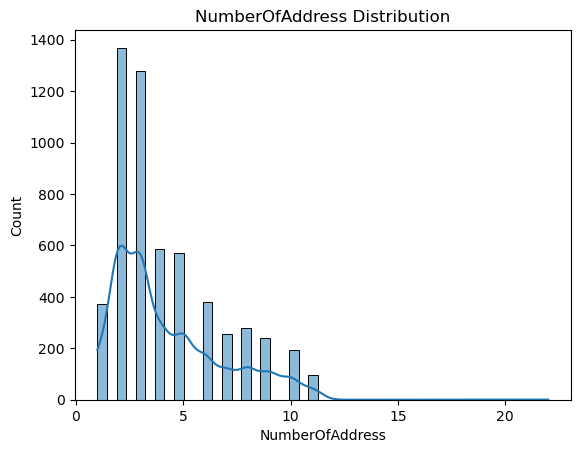

In [62]:
sns.histplot(df['NumberOfAddress'], kde=True)
plt.title('NumberOfAddress Distribution')
plt.xlabel('NumberOfAddress')
plt.show()

In [63]:
df['NumberOfAddress'].describe()

count    5630.000000
mean        4.214032
std         2.583586
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64

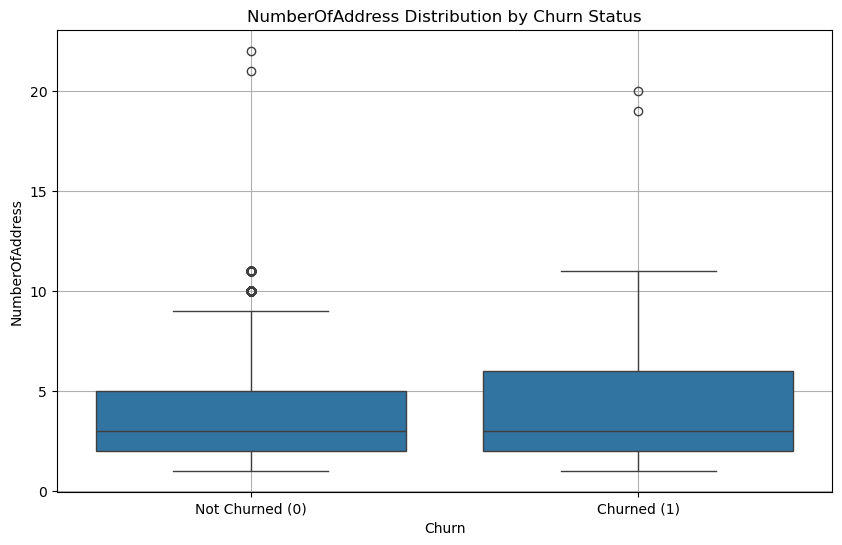

In [64]:
# 이탈 여부에 따른 등록 주소 수 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='NumberOfAddress', data=df)
plt.title('NumberOfAddress Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('NumberOfAddress')
plt.grid()
plt.show()

## Complain(컴플레인 여부)

<Axes: xlabel='Complain'>

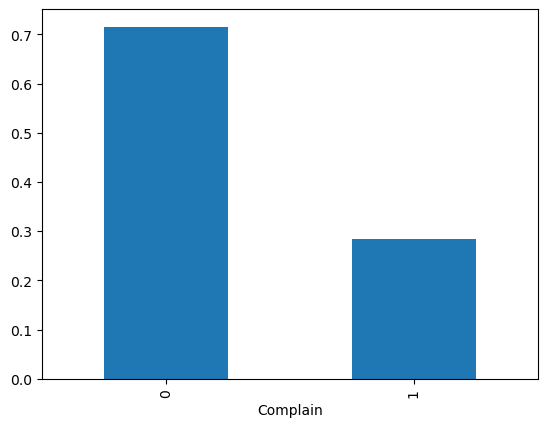

In [65]:
df['Complain'].value_counts(normalize=True).plot.bar()

전체 고객 중 30% 정도가 컴플레인 경험 있음

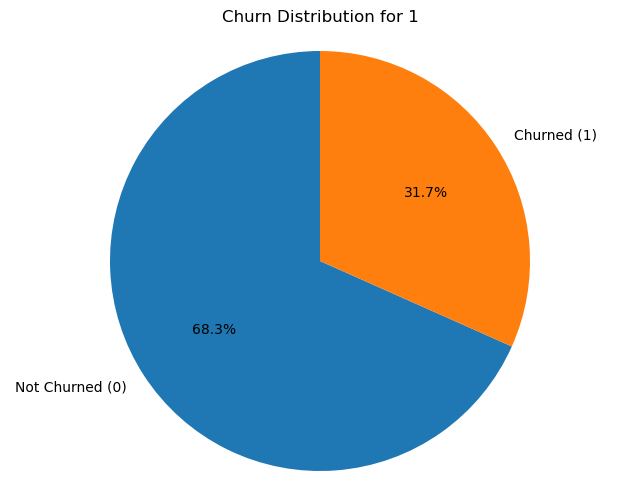

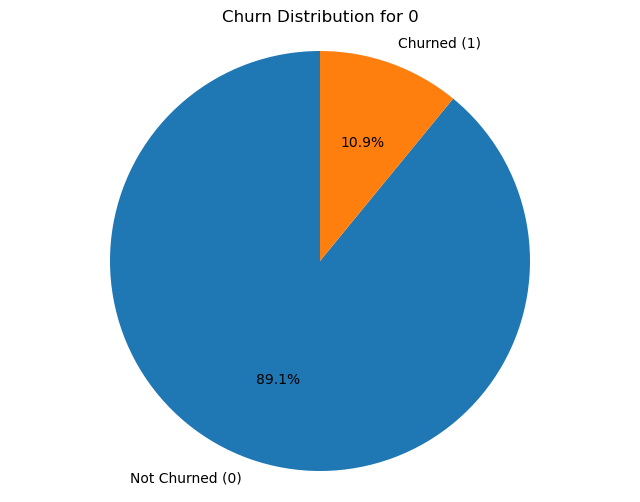

In [66]:
# 컴플레인 여부에 따른 이탈 비율 비교 - 파이차트
for com in df['Complain'].unique():
    plt.figure(figsize=(8, 6))
    com_data = df[df['Complain'] == com]
    churn_counts = com_data['Churn'].value_counts()

    plt.pie(churn_counts, labels=['Not Churned (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Churn Distribution for {com}')
    plt.axis('equal')
    plt.show()

컴플레인을 한 고객 중 이탈 비율이 더 높음

## OrderAmountHikeFromlastYear(작년 대비 주문 증가율)



In [67]:
df['OrderAmountHikeFromlastYear'].dtype

dtype('float64')

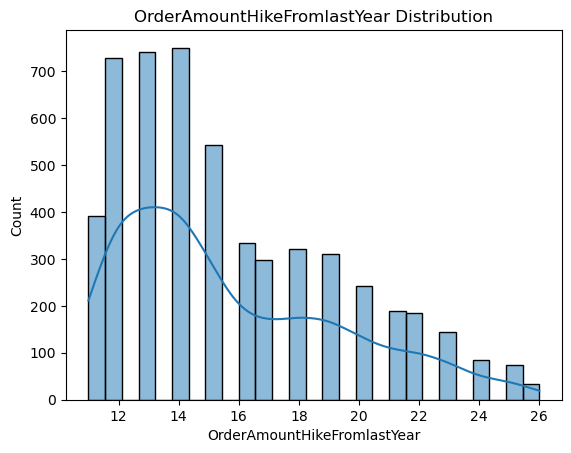

In [68]:
sns.histplot(df['OrderAmountHikeFromlastYear'], kde=True)
plt.title('OrderAmountHikeFromlastYear Distribution')
plt.xlabel('OrderAmountHikeFromlastYear')
plt.show()

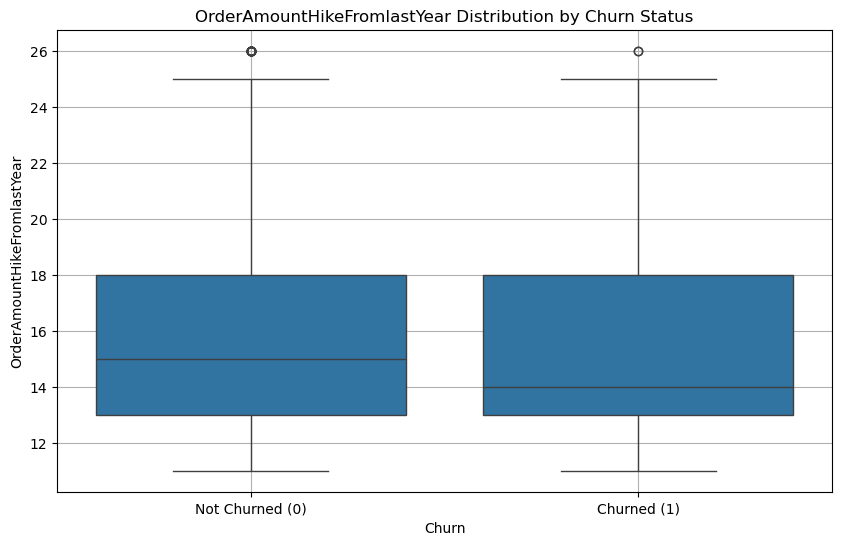

In [69]:
# 이탈 여부에 따른 주문 증가율 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df)
plt.title('OrderAmountHikeFromlastYear Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('OrderAmountHikeFromlastYear')
plt.grid()
plt.show()

## CouponUsed(쿠폰 사용 횟수)

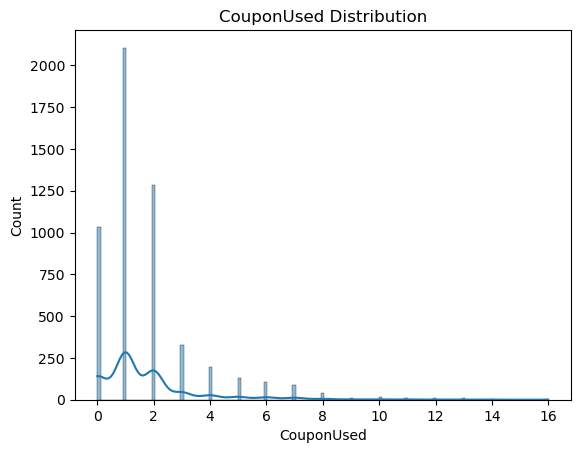

In [70]:
sns.histplot(df['CouponUsed'], kde=True)
plt.title('CouponUsed Distribution')
plt.xlabel('CouponUsed')
plt.show()

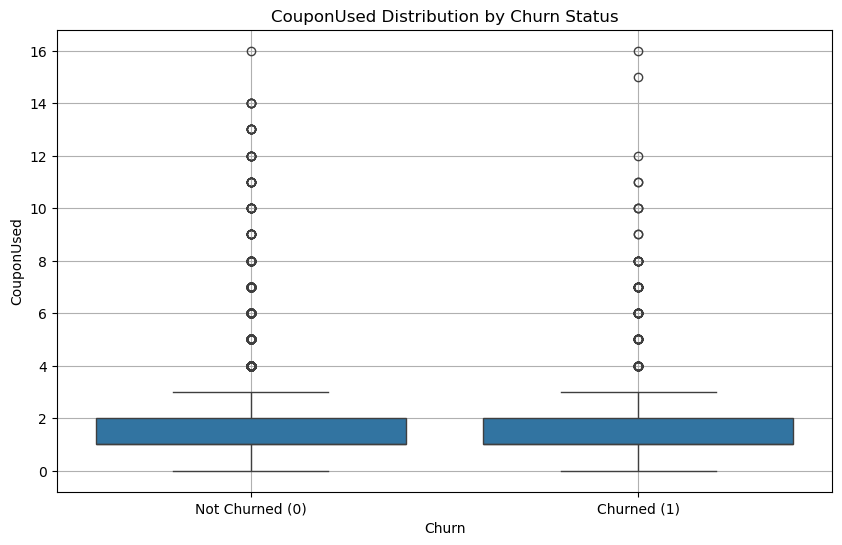

In [71]:
# 이탈 여부에 따른 쿠폰 사용 횟수 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CouponUsed', data=df)
plt.title('CouponUsed Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('CouponUsed')
plt.grid()
plt.show()

쿠폰을 10회 이상 쓰고도 이탈한 사람이 있음

## OrderCount(주문 횟수)

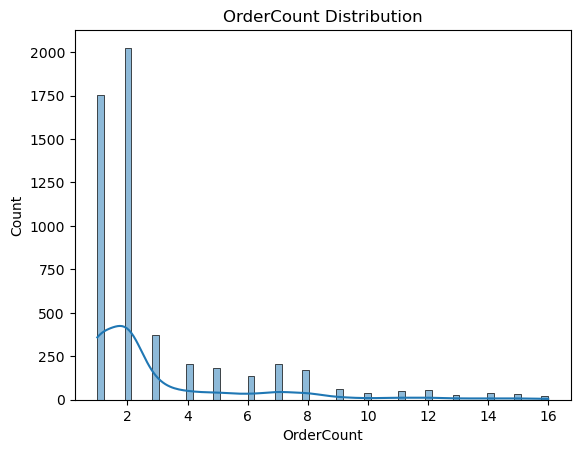

In [72]:
sns.histplot(df['OrderCount'], kde=True)
plt.title('OrderCount Distribution')
plt.xlabel('OrderCount')
plt.show()

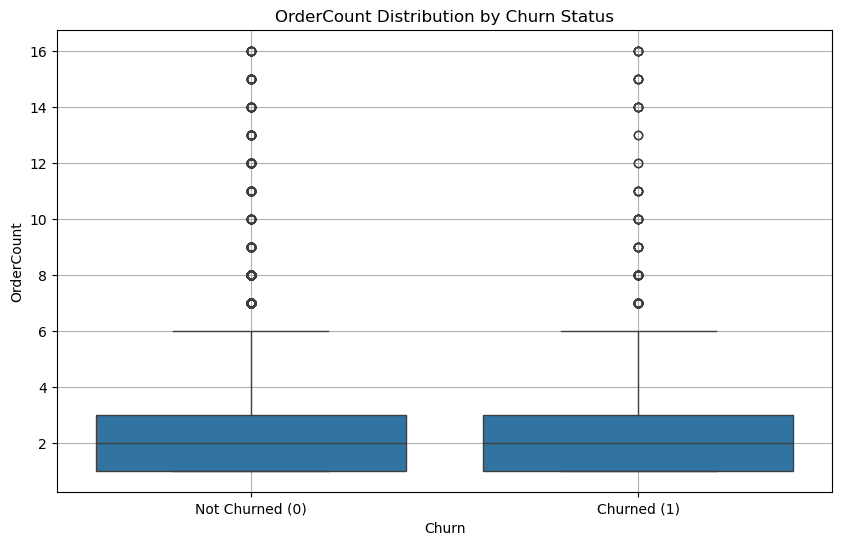

In [73]:
# 이탈 여부에 따른 주문 횟수 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='OrderCount', data=df)
plt.title('OrderCount Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('OrderCount')
plt.grid()
plt.show()

## DaySinceLastOrder(마지막 주문 후 경과일)

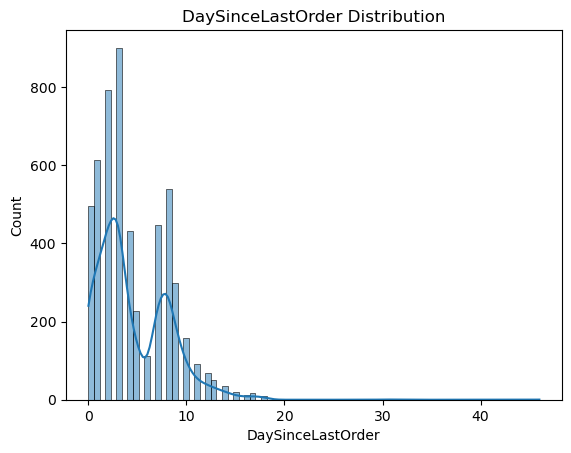

In [74]:
sns.histplot(df['DaySinceLastOrder'], kde=True)
plt.title('DaySinceLastOrder Distribution')
plt.xlabel('DaySinceLastOrder')
plt.show()

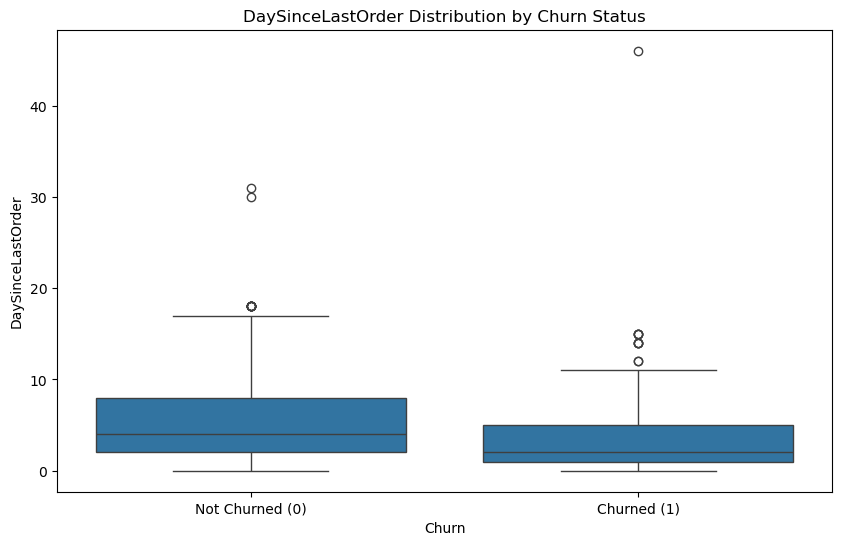

In [75]:
# 이탈 여부에 따른 주문 경과일 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('DaySinceLastOrder Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('DaySinceLastOrder')
plt.show()

## CashbackAmount(캐시백 금액)

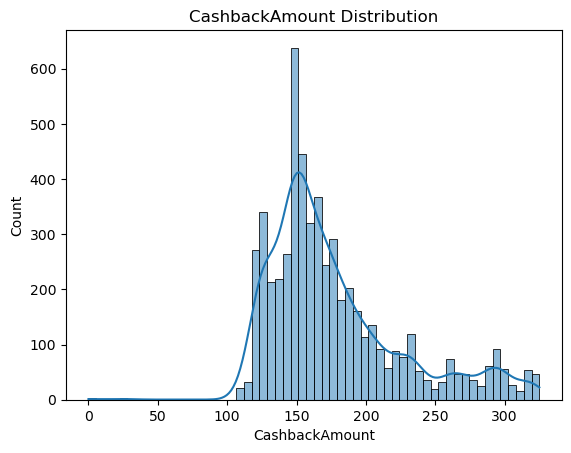

In [76]:
sns.histplot(df['CashbackAmount'], kde=True)
plt.title('CashbackAmount Distribution')
plt.xlabel('CashbackAmount')
plt.show()

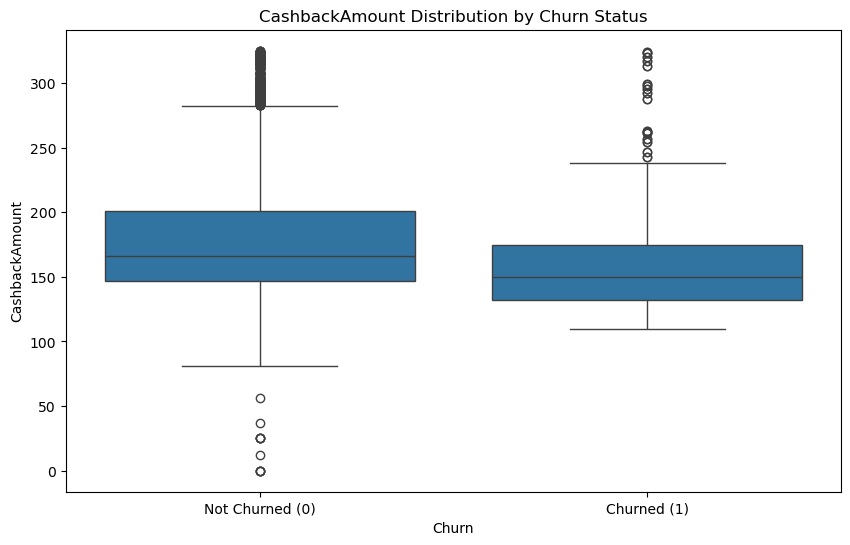

In [77]:
# 이탈 여부에 따른 캐시백 금액 비교 - 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CashbackAmount', data=df)
plt.title('CashbackAmount Distribution by Churn Status')
plt.xticks([0, 1], ['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('CashbackAmount')
plt.show()

이탈하지 않은 고객이 미세하게 높음

# 가설 검정

통계 검정을 해볼만한 가설들

- 인구통계학적 측면
    - 성별에 따라 이탈률에 차이가 있다.
    - 결혼 유무에 따라 이탈률에 차이가 있다.
    - 배송 거리가 멀수록 이탈률이 높다.
    - 도시계층에 따라 이탈률에 차이가 있다.
- 고객 행동 측면
    - 가입 기간이 짧을수록 이탈률이 높다.
    - 주 사용 기기(로그인 기기)에 따라 이탈률에 차이가 있다.
    - 만족도가 낮을수록 이탈률이 높다.
    - 등록된 기기 수가 많을수록 이탈률이 낮다.
    - 선호 주문 품목에 따라 이탈률에 차이가 있다.
    - 컴플레인 경험에 따라 이탈률에 차이가 있다.
    - 쿠폰 사용 횟수가 높을수록 이탈률이 낮다.
    - 캐시백 금액이 적을수록 이탈률이 높다.
    - 모바일 앱/웹사이트에서 소비한 시간이 길수록 이탈률이 낮다.
    - 작년 대비 주문 증가율이 높은 고객일수록 이탈률이 낮다.
    - 지난달에 이루어진 총 주문 수가 많은 고객일수록 이탈률이 낮다.
    - 고객이 마지막으로 주문한 후 경과된 일수가 높은 고객일수록 이탈률이 높다.

In [78]:
# 우선 결측치를 삭제한 데이터로 진행
# 결측치를 임의로 채울 경우 검정 결과를 왜곡할 가능성이 있기 때문

df2 = df.copy()

df2 = df2.dropna()

## 수치형 - 독립표본 T검정

### 1. 가입기간 비교

두 집단의 수치형 변수 비교이므로 **독립표본 T검정** 사용

<가정>

+ 독립성: 두 집단의 관측치는 서로 독립적이어야 합니다.

+ 정규성: 각 집단의 데이터가 정규 분포를 따라야 합니다. (샘플의 크기가 충분히 클 경우, 중심극한정리에 따라 정규성을 무시할 수 있음)

+ 등분산성: 두 집단의 분산이 동일하다는 가정이 필요합니다. (Levene's Test 등을 통해 확인할 수 있음)


<검정 절차>

가설 설정:

+ 귀무가설 (H0): 두 집단의 평균은 같다. (μ1 = μ2)

+ 대립가설 (H1): 두 집단의 평균은 다르다. (μ1 ≠ μ2)

+ t-통계량 계산

+ 유의확률(p-value) 계산: t-통계량을 바탕으로 p-value를 구합니다.

+ 의사결정: p-value가 설정한 유의수준(보통 0.05)보다 작으면 귀무가설을 기각하고, 두 집단의 평균이 다르다고 결론 짓습니다.

In [79]:
# 우선 두 집단 분리 (이탈 집단 / 이탈하지 않은 집단)
churn_group = df2[df2['Churn'] == 1]
non_churn_group = df2[df2['Churn'] == 0]

# 집단의 크기 확인 (일반적으로 30보다 클 경우 중심극한정리에 의해 정규성을 만족한다고 가정)
print("Churn Group Size:", len(churn_group))
print("Non-Churn Group Size:", len(non_churn_group))

Churn Group Size: 631
Non-Churn Group Size: 3143


In [80]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['Tenure'], non_churn_group['Tenure'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 278.0718530068527
p-value: 2.7115766807238465e-60
등분산성이 기각되었습니다.


In [81]:
# 독립표본 t 검정 (이분산)
t_stat, p_value = stats.ttest_ind(churn_group['Tenure'], non_churn_group['Tenure'], equal_var=False)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: -29.150401180248014
p-value: 3.713980529436408e-144
두 집단의 평균은 유의미하게 다릅니다.


이탈 집단의 가입 기간 평균이 유의미하게 짧음

In [82]:
## 효과크기 계산: 두 집단간의 차이가 얼마나 중요한지 알 수 있음

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['Tenure'].mean()
mean_non_churn = non_churn_group['Tenure'].mean()
std_churn = churn_group['Tenure'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['Tenure'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: -0.9686638171412169
효과 크기: 큼


### 2. 배송 거리 비교

위와 동일한 과정으로 배송 거리 평균 비교

In [83]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['WarehouseToHome'], non_churn_group['WarehouseToHome'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 7.6685897237870595
p-value: 0.005646508320764617
등분산성이 기각되었습니다.


In [84]:
# 독립표본 t 검정 (이분산)
t_stat, p_value = stats.ttest_ind(churn_group['WarehouseToHome'], non_churn_group['WarehouseToHome'], equal_var=False)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: 5.336755236240331
p-value: 1.2001189913687217e-07
두 집단의 평균은 유의미하게 다릅니다.


이탈 집단의 평균 배송 거리가 유의미하게 더 멂

In [85]:
## 효과크기 계산

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['WarehouseToHome'].mean()
mean_non_churn = non_churn_group['WarehouseToHome'].mean()
std_churn = churn_group['WarehouseToHome'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['WarehouseToHome'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: 0.2348354515285393
효과 크기: 중간


### 3. 등록 기기 수 비교

In [86]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['NumberOfDeviceRegistered'], non_churn_group['NumberOfDeviceRegistered'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 1.2414649420701986
p-value: 0.26525990031784824
등분산성이 수용됩니다.


In [87]:
# 독립표본 t 검정 (등분산)
t_stat, p_value = stats.ttest_ind(churn_group['NumberOfDeviceRegistered'], non_churn_group['NumberOfDeviceRegistered'], equal_var=True)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: 9.256999542055853
p-value: 3.43416221371241e-20
두 집단의 평균은 유의미하게 다릅니다.


In [88]:
print(churn_group['NumberOfDeviceRegistered'].mean())
print(non_churn_group['NumberOfDeviceRegistered'].mean())

4.0950871632329635
3.68565065224308


오히려 이탈 그룹의 등록 기기 수가 유의미하게 많다는 결과가 나옴

In [89]:
## 효과크기 계산

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['NumberOfDeviceRegistered'].mean()
mean_non_churn = non_churn_group['NumberOfDeviceRegistered'].mean()
std_churn = churn_group['NumberOfDeviceRegistered'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['NumberOfDeviceRegistered'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: 0.4038167414966133
효과 크기: 중간


### 4. 쿠폰 사용 횟수 비교

In [90]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['CouponUsed'], non_churn_group['CouponUsed'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 0.05567743781531049
p-value: 0.8134759999681858
등분산성이 수용됩니다.


In [91]:
# 독립표본 t 검정 (등분산)
t_stat, p_value = stats.ttest_ind(churn_group['CouponUsed'], non_churn_group['CouponUsed'], equal_var=True)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: 0.6745201172433336
p-value: 0.5000220375399353
두 집단의 평균은 유의미하게 다르지 않습니다.


이탈 고객과 이탈하지 않은 고객의 평균 쿠폰 사용 횟수는 통계적으로 유의미하게 다르지 않음

### 5. 캐시백 금액 비교

In [92]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['CashbackAmount'], non_churn_group['CashbackAmount'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 0.9186792449137006
p-value: 0.33788342791885895
등분산성이 수용됩니다.


In [93]:
# 독립표본 t 검정 (등분산)
t_stat, p_value = stats.ttest_ind(churn_group['CashbackAmount'], non_churn_group['CashbackAmount'], equal_var=True)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: -3.6216241560489233
p-value: 0.0002966109767551755
두 집단의 평균은 유의미하게 다릅니다.


In [94]:
## 효과크기 계산

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['CashbackAmount'].mean()
mean_non_churn = non_churn_group['CashbackAmount'].mean()
std_churn = churn_group['CashbackAmount'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['CashbackAmount'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: -0.15798558258287246
효과 크기: 작음


In [95]:
print(mean_churn)
print(mean_non_churn)

161.05071315372425
164.85046134266625


이탈한 집단의 캐시백 금액 평균이 유의미하게 작으나 그 효과 크기는 작음(중요한 차이라고 볼 수는 없음)

### 앱 사용 시간 비교

In [96]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['HourSpendOnApp'], non_churn_group['HourSpendOnApp'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 5.949177185761865
p-value: 0.01476995725522795
등분산성이 기각되었습니다.


In [97]:
# 독립표본 t 검정 (이분산)
t_stat, p_value = stats.ttest_ind(churn_group['HourSpendOnApp'], non_churn_group['HourSpendOnApp'], equal_var=False)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: 3.9485985235077212
p-value: 8.440714543910509e-05
두 집단의 평균은 유의미하게 다릅니다.


In [98]:
## 효과크기 계산

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['HourSpendOnApp'].mean()
mean_non_churn = non_churn_group['HourSpendOnApp'].mean()
std_churn = churn_group['HourSpendOnApp'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['HourSpendOnApp'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: 0.1633167553444496
효과 크기: 작음


### 작년 대비 주문 증가율 비교

In [99]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['OrderAmountHikeFromlastYear'], non_churn_group['OrderAmountHikeFromlastYear'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 3.2473934169846657
p-value: 0.07161694513089512
등분산성이 수용됩니다.


In [100]:
# 독립표본 t 검정 (등분산)
t_stat, p_value = stats.ttest_ind(churn_group['OrderAmountHikeFromlastYear'], non_churn_group['OrderAmountHikeFromlastYear'], equal_var=True)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: 1.0561012675753885
p-value: 0.2909895863179834
두 집단의 평균은 유의미하게 다르지 않습니다.


### 지난달 이루어진 총 주문 수 비교

In [101]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['OrderCount'], non_churn_group['OrderCount'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 4.298158417844866
p-value: 0.038221402114118855
등분산성이 기각되었습니다.


In [102]:
# 독립표본 t 검정 (이분산)
t_stat, p_value = stats.ttest_ind(churn_group['OrderCount'], non_churn_group['OrderCount'], equal_var=False)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: -0.12594512570234234
p-value: 0.8998022347707484
두 집단의 평균은 유의미하게 다르지 않습니다.


### 마지막 주문 후 경과일 비교

In [103]:
# 등분산 검정(Levene's Test)
from scipy import stats

levene_stat, p_value = stats.levene(churn_group['DaySinceLastOrder'], non_churn_group['DaySinceLastOrder'])

print("Levene's Test Statistic:", levene_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("등분산성이 기각되었습니다.")
else:
    print("등분산성이 수용됩니다.")

Levene's Test Statistic: 19.03315587174724
p-value: 1.3190339372463894e-05
등분산성이 기각되었습니다.


In [104]:
# 독립표본 t 검정 (이분산)
t_stat, p_value = stats.ttest_ind(churn_group['DaySinceLastOrder'], non_churn_group['DaySinceLastOrder'], equal_var=False)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value 해석
if p_value < 0.05:
    print("두 집단의 평균은 유의미하게 다릅니다.")
else:
    print("두 집단의 평균은 유의미하게 다르지 않습니다.")

t-통계량: -8.697228776583698
p-value: 1.577013888465696e-17
두 집단의 평균은 유의미하게 다릅니다.


In [105]:
## 효과크기 계산

# 1. 평균 및 표준편차 계산
mean_churn = churn_group['DaySinceLastOrder'].mean()
mean_non_churn = non_churn_group['DaySinceLastOrder'].mean()
std_churn = churn_group['DaySinceLastOrder'].std(ddof=1)  # 표본 표준편차
std_non_churn = non_churn_group['DaySinceLastOrder'].std(ddof=1)

# 2. 샘플 크기
n1 = len(churn_group)
n2 = len(non_churn_group)

# 3. Pooled 표준편차 계산
s_p = np.sqrt(((n1 - 1) * std_churn**2 + (n2 - 1) * std_non_churn**2) / (n1 + n2 - 2))

# 4. Cohen's d 계산
cohen_d = (mean_churn - mean_non_churn) / s_p

print("Cohen's d:", cohen_d)

# 5. 효과 크기 해석
if abs(cohen_d) < 0.2:
    print("효과 크기: 작음")
elif abs(cohen_d) < 0.5:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Cohen's d: -0.3767558931973787
효과 크기: 중간


In [106]:
print(mean_churn)
print(mean_non_churn)

3.4786053882725834
4.736557429207763


## 범주형 - 카이제곱 검정

### 6. 주 사용 기기 비교

범주형 변수(이탈 여부, 선호 로그인 기기) 간의 독립성을 파악하는 검정이므로 **카이제곱 검정** 사용

<절차>

1. 가설 설정:

  + 귀무 가설(H0): 두 범주형 변수는 독립적이다.

  + 대립가설(H1): 두 범주형 변수는 독립적이지 않다.

2. 데이터 준비:

  두 변수의 빈도 수를 포함하는 교차표(Contingency Table)를 작성합니다.

3. 카이제곱 통계량 계산

4. p-value 계산:

  카이제곱 통계량을 기반으로 p-value를 계산하여 귀무가설을 기각할지 결정합니다.

5. 결과 해석:

  p-value가 설정한 유의수준(종종 0.05)보다 작으면 귀무가설을 기각하고, 두 변수 간에 관계가 있다고 판단합니다.

<전제 조건>

전체 셀 중 20% 이상이 기대 빈도가 5 미만인 경우에도 검정 결과가 신뢰할 수 없을 수 있습니다. 이런 경우 Fisher의 정확 검정 등 다른 방법을 사용해야 합니다.

In [107]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['PreferredLoginDevice'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 73.53679418373687
p-value: 1.0756922373255214e-16
두 변수는 서로 유의미한 관계가 있습니다.


In [108]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 73.53679418373687
p-value: 1.0756922373255214e-16
Cramér's V: 0.11428734639476418
효과 크기: 중간


In [109]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인 : 조정된 잔차의 절댓값이 2보다 클 경우 유의미하다고 봄
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
PreferredLoginDevice  Computer  Mobile Phone     Phone
Churn                                                 
0                    -1.325488      2.452039 -2.147785
1                     2.945691     -5.449278  4.773120
유의미한 셀:
PreferredLoginDevice  Computer  Mobile Phone     Phone
Churn                                                 
0                          NaN      2.452039 -2.147785
1                     2.945691     -5.449278  4.773120


### 7. 만족도 비교

만족도는 현재 데이터에서는 숫자 타입이긴 하나, 5점 척도로 구분된 순서형 변수로 보는 것이 더 적합하다고 생각했음

따라서 위와 동일한 과정으로 카이제곱검정 수행

In [110]:
df['SatisfactionScore'] = df['SatisfactionScore'].astype(str)

In [111]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['SatisfactionScore'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 69.8653884066938
p-value: 2.4233349782737515e-14
두 변수는 서로 유의미한 관계가 있습니다.


In [112]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 69.8653884066938
p-value: 2.4233349782737515e-14
Cramér's V: 0.11139785834165415
효과 크기: 중간


In [113]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
SatisfactionScore         1         2         3         4         5
Churn                                                              
0                  1.992708  1.117657 -0.161919 -0.105601 -2.550838
1                 -4.428486 -2.483820  0.359840  0.234681  5.668844
유의미한 셀:
SatisfactionScore         1        2   3   4         5
Churn                                                 
0                       NaN      NaN NaN NaN -2.550838
1                 -4.428486 -2.48382 NaN NaN  5.668844


### 8. 선호 주문 품목 비교

In [114]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['PreferedOrderCat'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 288.63939355672443
p-value: 2.7708325346337443e-60
두 변수는 서로 유의미한 관계가 있습니다.


In [115]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 288.63939355672443
p-value: 2.7708325346337443e-60
Cramér's V: 0.22642459743297855
효과 크기: 중간


In [116]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
PreferedOrderCat   Fashion   Grocery  Laptop & Accessory    Mobile  \
Churn                                                                
0                 0.422942  2.655664            3.274122 -3.229924   
1                -0.939922 -5.901802           -7.276230  7.178005   

PreferedOrderCat  Mobile Phone    Others  
Churn                                     
0                    -4.182681  1.650341  
1                     9.295361 -3.667628  
유의미한 셀:
PreferedOrderCat  Fashion   Grocery  Laptop & Accessory    Mobile  \
Churn                                                               
0                     NaN  2.655664            3.274122 -3.229924   
1                     NaN -5.901802           -7.276230  7.178005   

PreferedOrderCat  Mobile Phone    Others  
Churn                                     
0                    -4.182681       NaN  
1                     9.295361 -3.667628  


### 9. 컴플레인 경험 유무 비교

In [117]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['Complain'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 350.92545525927073
p-value: 2.664460965464137e-78
두 변수는 서로 유의미한 관계가 있습니다.


In [118]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 350.92545525927073
p-value: 2.664460965464137e-78
Cramér's V: 0.24966245605686588
효과 크기: 중간


In [119]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
Complain         0          1
Churn                        
0         4.111678  -6.514090
1        -9.137568  14.476558
유의미한 셀:
Complain         0          1
Churn                        
0         4.111678  -6.514090
1        -9.137568  14.476558


Adjusted Residuals:

+ 값이 양수인 경우: 해당 셀의 관찰 빈도가 기대 빈도보다 더 높다는 것을 의미합니다.

+ 값이 음수인 경우: 해당 셀의 관찰 빈도가 기대 빈도보다 더 낮다는 것을 의미합니다.

결과 해석:

+ Complain = 0, Churn = 0: 조정된 잔차가 4.11입니다. 이는 기대 빈도보다 관찰 빈도가 상당히 높다는 것을 의미하며, 이 조합이 통계적으로 유의미하게 더 많이 발생했음을 나타냅니다.

+ Complain = 1, Churn = 0: 조정된 잔차가 -6.51입니다. 이는 기대 빈도보다 관찰 빈도가 낮다는 것을 의미하며, 이 조합이 통계적으로 유의미하게 덜 발생했음을 나타냅니다.

+ Complain = 0, Churn = 1: 조정된 잔차가 -9.14입니다. 이 조합도 기대 빈도보다 낮아, 이탈 고객이 컴플레인을 하지 않는 경우가 통계적으로 유의미하게 적다는 것을 의미합니다.

+ Complain = 1, Churn = 1: 조정된 잔차가 14.48입니다. 이는 기대 빈도보다 관찰 빈도가 매우 높다는 것을 나타내며, 이 조합이 통계적으로 유의미하게 많이 발생한다는 것을 의미합니다.

<종합 해석>

유의미한 셀:

컴플레인이 있는 고객(Complain = 1) 중 이탈(Churn = 1)하는 비율이 매우 높다는 것을 확인할 수 있습니다.

반대로, 컴플레인이 없는 고객(Complain = 0) 중 이탈(Churn = 0)하지 않는 비율이 유의미하게 높고, 이탈 고객 중 컴플레인이 없는 경우는 적다는 것을 알 수 있습니다.

### 성별 비교

In [120]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['Gender'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 4.662908495367532
p-value: 0.03082094033489006
두 변수는 서로 유의미한 관계가 있습니다.


In [121]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 4.662908495367532
p-value: 0.03082094033489006
Cramér's V: 0.028778903905673597
효과 크기: 작음


In [122]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
Gender    Female      Male
Churn                     
0       0.698542 -0.569091
1      -1.552401  1.264718
유의미한 셀:
Gender  Female  Male
Churn               
0          NaN   NaN
1          NaN   NaN


### 결혼 여부 비교

In [123]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['MaritalStatus'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 188.6710396770566
p-value: 1.073011277910542e-41
두 변수는 서로 유의미한 관계가 있습니다.


In [124]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 188.6710396770566
p-value: 1.073011277910542e-41
Cramér's V: 0.1830620931826161
효과 크기: 중간


In [125]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
MaritalStatus  Divorced   Married     Single
Churn                                       
0              0.707542  3.186593  -4.595011
1             -1.572402 -7.081710  10.211702
유의미한 셀:
MaritalStatus  Divorced   Married     Single
Churn                                       
0                   NaN  3.186593  -4.595011
1                   NaN -7.081710  10.211702


### 도시 계층 비교

In [126]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['Churn'], df['CityTier'])

# 기대 빈도 계산
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 기대 빈도에서 5 미만인 셀의 비율 계산
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
low_expected_count = (expected_df < 5).sum().sum()  # 기대 빈도가 5 미만인 셀 수
total_cells = expected_df.size
low_expected_ratio = low_expected_count / total_cells

# 조건 확인 및 카이제곱 검정 수행
if low_expected_ratio < 0.2:
    print("카이제곱 검정을 수행합니다.")
    print("Chi-squared Statistic:", chi2_stat)
    print("p-value:", p_value)

    # p-value 해석
    if p_value < 0.05:
        print("두 변수는 서로 유의미한 관계가 있습니다.")
    else:
        print("두 변수는 서로 유의미한 관계가 없습니다.")
else:
    print(f"기대 빈도가 5 미만인 셀이 전체의 {low_expected_ratio * 100:.2f}% 입니다. 카이제곱 검정을 수행할 수 없습니다.")

카이제곱 검정을 수행합니다.
Chi-squared Statistic: 40.982404247736355
p-value: 1.2612000812079958e-09
두 변수는 서로 유의미한 관계가 있습니다.


In [127]:
## 카이제곱 검정의 효과 크기 계산: Cramér's V

# Cramér's V 계산
n = contingency_table.sum().sum()  # 총 샘플 크기
k = contingency_table.shape[0]  # 첫 번째 변수의 범주 수
r = contingency_table.shape[1]  # 두 번째 변수의 범주 수

cramers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# 결과 출력
print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Cramér's V:", cramers_v)

# Cramér's V 해석
if cramers_v < 0.1:
    print("효과 크기: 작음")
elif cramers_v < 0.3:
    print("효과 크기: 중간")
else:
    print("효과 크기: 큼")

Chi-squared Statistic: 40.982404247736355
p-value: 1.2612000812079958e-09
Cramér's V: 0.08531875687625065
효과 크기: 작음


In [128]:
## 구체적으로 유의미한 셀들을 알아보기 위해 조정된 잔차 계산

# 잔차 계산
residuals = contingency_table - expected
adjusted_residuals = residuals / np.sqrt(expected)

# 결과 출력
print("Adjusted Residuals:")
print(adjusted_residuals)

# 유의미한 셀 확인
significant_cells = adjusted_residuals[(adjusted_residuals > 2) | (adjusted_residuals < -2)]
print("유의미한 셀:")
print(significant_cells)

Adjusted Residuals:
CityTier         1         2         3
Churn                                 
0         1.544768 -0.511138 -2.062328
1        -3.433008  1.135925  4.583205
유의미한 셀:
CityTier         1   2         3
Churn                           
0              NaN NaN -2.062328
1        -3.433008 NaN  4.583205
